# Houston Astros Track Datathon Submission


## Imports

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [10]:
baseball = pd.read_csv('datathon_2024_dataset_corrected.csv')

## Fix up the data

In [11]:
# get rid of all columns except for the game date, home/away teams, ending scores
baseball_pruned = baseball.loc[:, ['game_date', 'home_team', 'away_team', 'home_score', 'away_score']]

In [12]:
# remove empty rows
baseball_pruned.dropna()


,game_date,home_team,away_team,home_score,away_score
0,20000329,NYN,CHN,3,5
1,20000330,CHN,NYN,1,5
2,20000403,ATL,COL,2,0
3,20000403,CIN,MIL,3,3
4,20000403,FLO,SFN,6,4
...,...,...,...,...,...
56770,20231001,CHA,SDN,1,2
56771,20231001,DET,CLE,5,2
56772,20231001,KCA,NYA,5,2
56773,20231001,SEA,TEX,1,0


In [13]:
# create 2 tables - one for when astros are the home team, one for when astros are the away team
astro_home = baseball_pruned[baseball_pruned['home_team']=='HOU']
astro_away = baseball_pruned[baseball_pruned['away_team']=='HOU']

## Arrange table for drawing conclusions

Process data on Astros home/away games

In [14]:
# create new table for storing counts
years = np.arange(2000, 2024, dtype=int)
empty = np.zeros(24, dtype=int)
emptyfloat = np.zeros(24, dtype=float)
datadict = {'year':years, 'homewins': empty, 'homegames':empty, 'awaywins':empty, 'awaygames':empty, 'home win proportion': emptyfloat, 'away win proportion': emptyfloat}
procFrame = pd.DataFrame(datadict)
procFrame
# go through home games
for useless_index, row in astro_home.iterrows():
        year = int((row['game_date'])/10000) - 2000
        procFrame.at[year, 'homegames'] = procFrame.at[year, 'homegames']+1
        if (int(row['home_score'])>int(row['away_score'])):
                procFrame.at[year, 'homewins'] = procFrame.at[year, 'homewins']+1
# go through away games
for useless_index, row in astro_away.iterrows():
        year = int((row['game_date'])/10000) - 2000
        procFrame.at[year, 'awaygames'] = procFrame.at[year, 'awaygames']+1
        if (int(row['away_score'])>int(row['home_score'])):
                procFrame.at[year, 'awaywins'] = procFrame.at[year, 'awaywins']+1
#calculate proportions
for index, row in procFrame.iterrows():
        procFrame.at[index, 'home win proportion'] = procFrame.at[index, 'homewins']/procFrame.at[index, 'homegames']
        procFrame.at[index, 'away win proportion'] = procFrame.at[index, 'awaywins']/procFrame.at[index, 'awaygames']
procFrame

,year,homewins,homegames,awaywins,awaygames,home win proportion,away win proportion
0,2000,39,81,33,81,0.481481,0.407407
1,2001,44,81,49,81,0.543210,0.604938
2,2002,47,81,37,81,0.580247,0.456790
3,2003,48,81,39,81,0.592593,0.481481
4,2004,48,81,44,81,0.592593,0.543210
5,2005,53,81,36,82,0.654321,0.439024
6,2006,44,81,38,81,0.543210,0.469136
7,2007,42,81,31,81,0.518519,0.382716
8,2008,47,80,39,81,0.587500,0.481481
9,2009,44,81,30,81,0.543210,0.370370


## Visualize Data

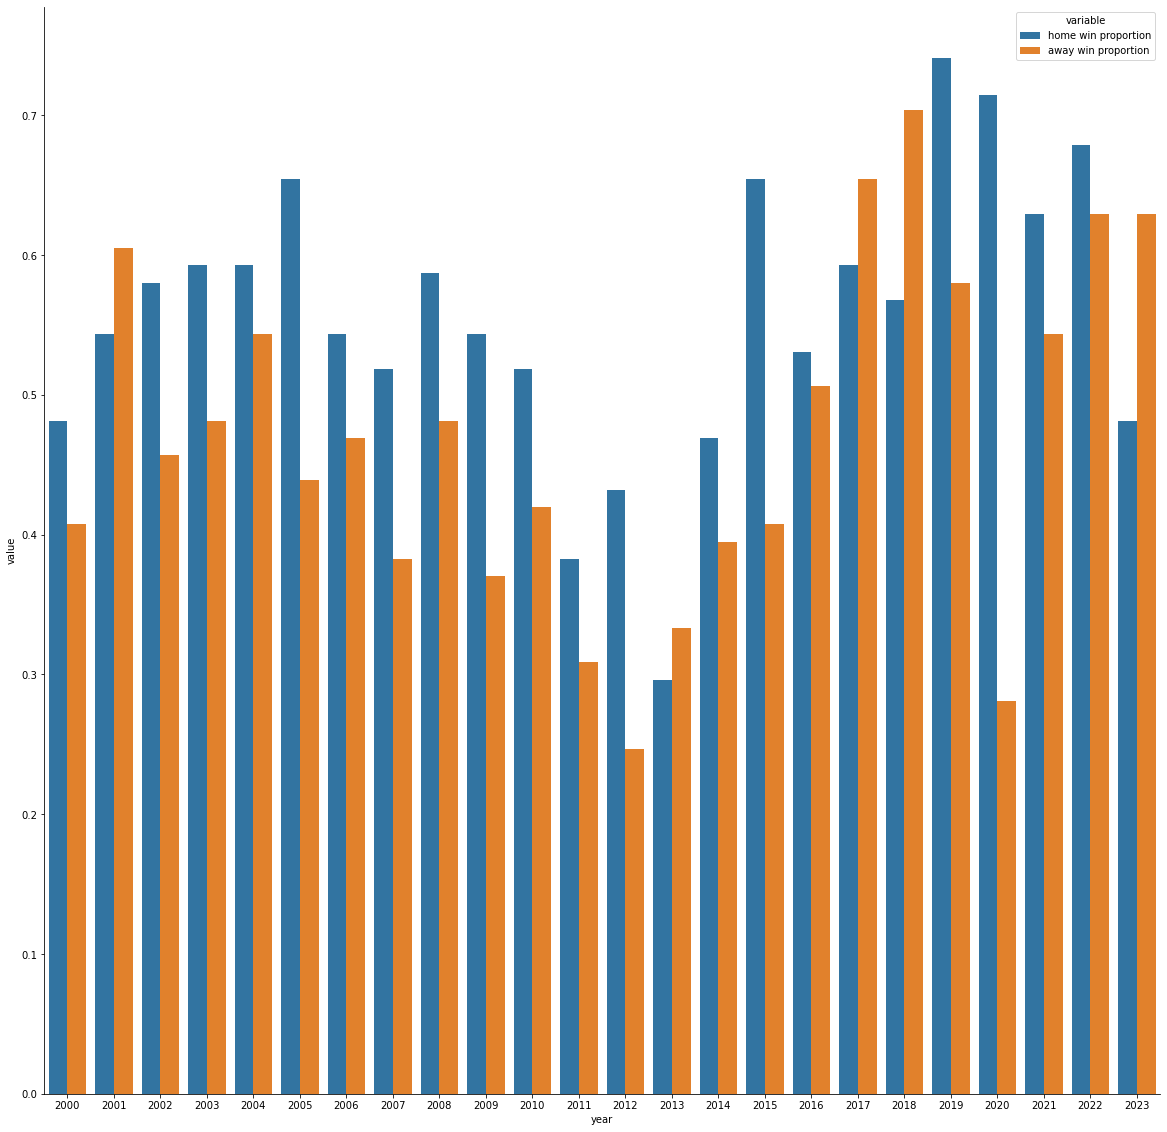

In [15]:
melty = procFrame.melt(id_vars='year', value_vars = ['home win proportion', 'away win proportion'])
# Bar graph comparing home wins and away wins by year
fig, ax1 = plt.subplots(figsize=(20, 20))
sns.barplot(x='year', y='value', hue='variable', data=melty, ax=ax1)
sns.despine(fig)